<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana4/MedioMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana4')

In [5]:
data = pd.read_csv('Datos/MediaMovilData.csv')
x = data.Ventas
#x

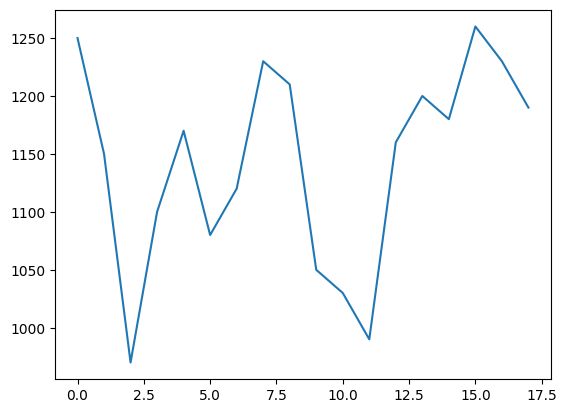

In [6]:
plt.plot(x)

In [7]:
def GetMediaMovil(x,n):

  media = np.zeros( len(x) + 1 )

  for i in range( len(media) ):

    sum_ = 0

    if i >= n:

      for j in range( i-n , i ):

        sum_ += x[j]

      media[i] = sum_/n

    else:
      media[i] = x[i]

  return media

In [8]:
media = GetMediaMovil(x,3)
media[-1]

np.float64(1226.6666666666667)

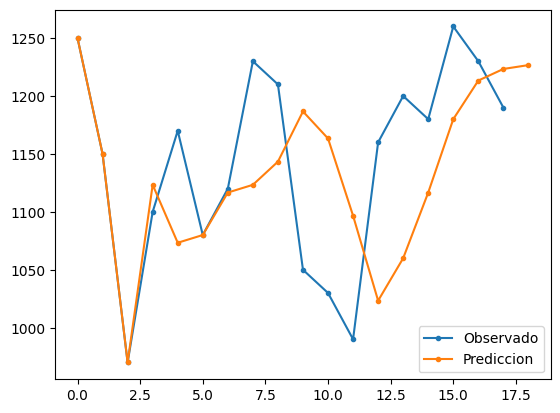

In [9]:
plt.plot(x,'.-',label='Observado')
plt.plot(media, '.-',label='Prediccion')
plt.legend()

In [10]:
def GetWeightMedialMovil(x,w):

  n = len(w)

  media = np.zeros( len(x) + 1 )

  for i in range( len(media) ):

    sum_ = 0.

    if i >= n:

      k = 0

      for j in range( i-n, i):

        sum_ += w[k]*x[j]
        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media


In [22]:
w = np.array([0.1,0.3,0.6])
Wmedia = GetWeightMedialMovil(x,w)
Wmedia[-1]

np.float64(1209.0)

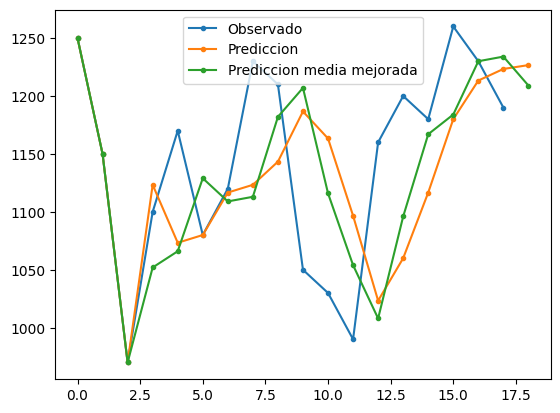

In [23]:
plt.plot(x,'.-',label='Observado')
plt.plot(media, '.-',label='Prediccion')
plt.plot(Wmedia, '.-',label='Prediccion media mejorada')
plt.legend()

In [24]:
# Que nos permite decidir que modelo es mejor?
# Cuantos dias escoger?
# Será la media movil un buen modelo?
# Que otros fectores influyen en las ventas? No tenemos más

In [25]:
# Necesitamos una métrica para decidir del universo de las medias moviles, cuál es la más verosimil?

In [26]:
def GetError(x,y):
  return np.mean( np.abs(x-y) )

In [27]:
GetError(x,Wmedia[:-1])

np.float64(58.5)

In [28]:
# Vamos a minimizar la distancia entre nuestro modelo y los datos reales
def Cost(w):

  Wmedia = GetWeightMedialMovil(x,w)
  Error = GetError(x,Wmedia[:-1])

  return Error

In [65]:
w0 = np.array([0.1,0.3,0.6])
Cost(w0)
np.sum(w0)

np.float64(1.0)

In [72]:
import scipy.optimize as optimize
from scipy.stats import norm

In [73]:
bounds = ((0,1),(0,1),(0,1))
constraints = ( {'type':'eq','fun': lambda w: np.sum(w) - 1} )
result = optimize.minimize(Cost, w0, options={'disp':True}, bounds=bounds, constraints=constraints)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.518520565200006
            Iterations: 18
            Function evaluations: 113
            Gradient evaluations: 18


In [74]:
wopt = result.x
print(np.round(wopt,2))

[0.13 0.   0.87]


In [75]:
OptMean = GetWeightMedialMovil(x,wopt)
OptMean[-1]

np.float64(1199.3335912636167)

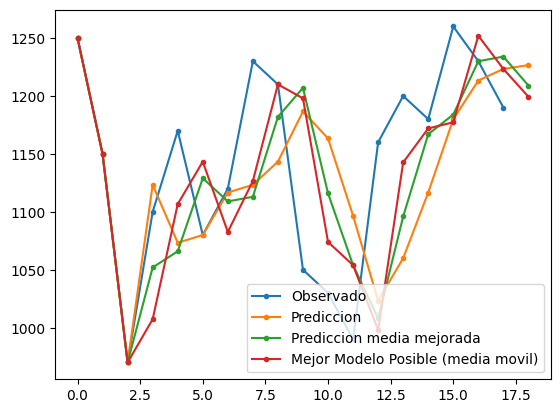

In [76]:
plt.plot(x,'.-',label='Observado')
plt.plot(media, '.-',label='Prediccion')
plt.plot(Wmedia, '.-',label='Prediccion media mejorada')
plt.plot(OptMean, '.-',label='Mejor Modelo Posible (media movil)')
plt.legend()

In [77]:
mean = OptMean[-1]
std = Cost(wopt)
print(mean,std)

1199.3335912636167 54.518520565200006


In [81]:
percetile = norm.ppf(0.95, mean, scale = std)
print(percetile)

1289.0085775513144


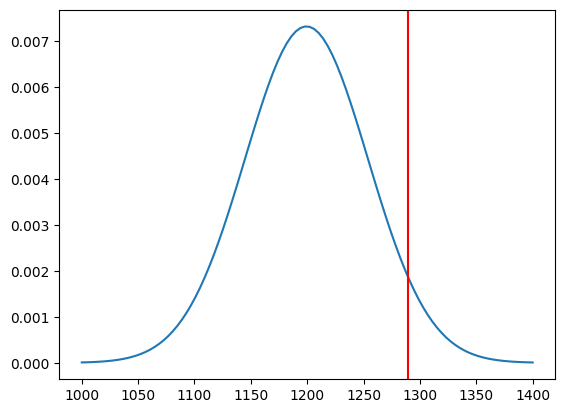

In [82]:
x1 = np.linspace(1000, 1400, 100)
y1 = norm.pdf( x1, mean, scale = std )
plt.plot(x1,y1)
plt.axvline(x=percetile, color='r')